In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

#Load the dataset

In [3]:
file_path = "Uniqlo(FastRetailing) 2012-2016 Training - stocks2012-2016.csv"
data = pd.read_csv(file_path)
print(data.head())


         Date   Open   High    Low  Close  Volume  Stock Trading
0  2016-12-30  42120  42330  41700  41830  610000    25628028000
1  2016-12-29  43000  43220  42540  42660  448400    19188227000
2  2016-12-28  43940  43970  43270  43270  339900    14780670000
3  2016-12-27  43140  43700  43140  43620  400100    17427993000
4  2016-12-26  43310  43660  43090  43340  358200    15547803000


#Preprocessing

In [5]:
if 'Date' in data.columns:
    data['Date'] = pd.to_datetime(data['Date'])
    data.set_index('Date', inplace=True)



#Select features and target

In [8]:
features = ['Open', 'High', 'Low', 'Volume']
target = 'Close'

# Select the 'Close' price for prediction


In [9]:
closing_prices = data['Close'].values.reshape(-1, 1)


#Scale the data

In [10]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(closing_prices)



# Create training and testing datasets


In [11]:
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]


#Create sequences for LSTM

In [34]:
def create_sequences(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)


#Define number of time steps

In [35]:
time_steps = 60


# Split into training and testing sets


In [36]:
X_train, y_train = create_sequences(train_data, time_steps)
X_test, y_test = create_sequences(test_data, time_steps)


#Build LSTM model

In [37]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_steps, 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(25))
model.add(Dense(1))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


#Compile the model

In [38]:
model.compile(optimizer='adam', loss='mean_squared_error')

#train the model

In [39]:
history = model.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_test, y_test), verbose=1)


Epoch 1/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 69ms/step - loss: 0.0972 - val_loss: 0.0224
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - loss: 0.0080 - val_loss: 0.0127
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - loss: 0.0045 - val_loss: 0.0050
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0036 - val_loss: 0.0028
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 0.0038 - val_loss: 0.0026
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0033 - val_loss: 0.0018
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 0.0033 - val_loss: 0.0025
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 0.0034 - val_loss: 0.0020
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - loss: 0.0026 - val_loss: 0.0015
Epoch 10/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.0029 - val_loss: 0.0024
Epoch 11/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0030 - val_loss: 0.0026
Epoch 12/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 0.0

# Predict on the test set


In [41]:
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)



6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


# Reverse scaling for actual Close prices

In [42]:
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))


# Plot predictions vs. actual


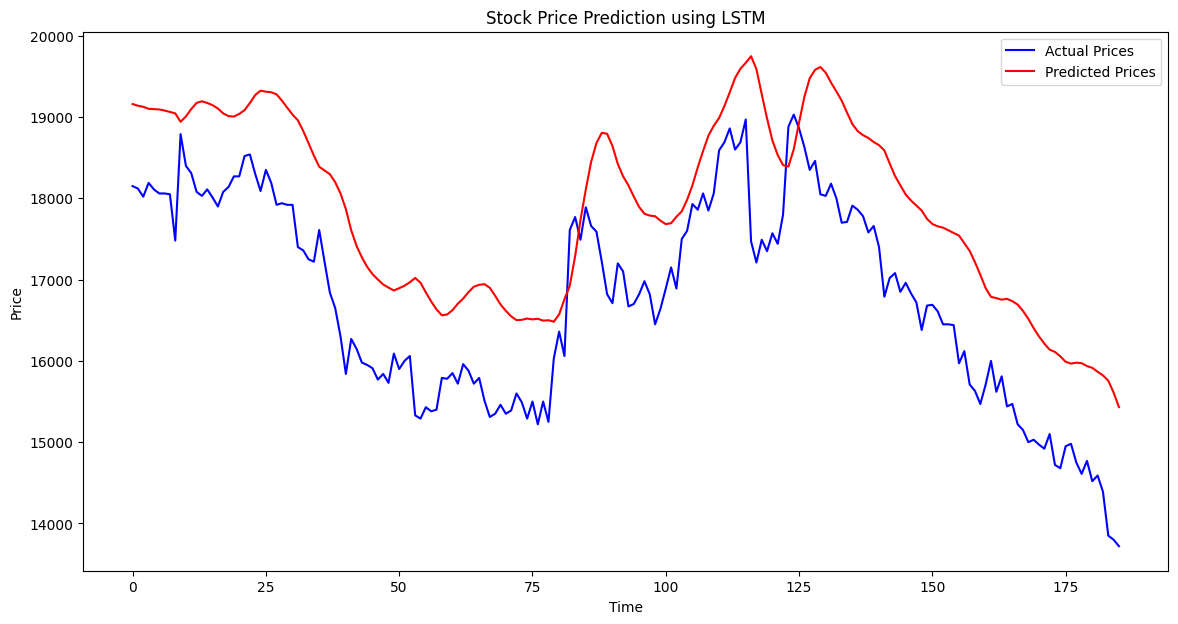

In [44]:
plt.figure(figsize=(14, 7))
plt.plot(actual_prices, label='Actual Prices', color='blue')
plt.plot(predicted_prices, label='Predicted Prices', color='red')
plt.title('Stock Price Prediction using LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()